In [46]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

продолжаем? (+ или -)+
начало: 1
конец: 2
вес: 12
продолжаем? (+ или -)+
начало: 4
конец: 5
вес: 34
продолжаем? (+ или -)+
начало: 2
конец: 3
вес: 15
продолжаем? (+ или -)+
начало: 5
конец: 6
вес: 7
продолжаем? (+ или -)+
начало: 3
конец: 6
вес: 6
продолжаем? (+ или -)+
начало: 6
конец: 7
вес: 8
продолжаем? (+ или -)+
начало: 7
конец: 8
вес: 11
продолжаем? (+ или -)+
начало: 10
конец: 11
вес: 22
продолжаем? (+ или -)+
начало: 8
конец: 9
вес: 16
продолжаем? (+ или -)+
начало: 9
конец: 12
вес: 30
продолжаем? (+ или -)+
начало: 11
конец: 12
вес: 5
продолжаем? (+ или -)-


{(1, 2): Text(0.6988653256379012, 0.3291718738121885, '12'),
 (2, 3): Text(0.5077679211208544, 0.22530602516526585, '15'),
 (4, 5): Text(0.5140044241776958, -0.027744456877318417, '34'),
 (5, 6): Text(0.2913267409908187, -0.02384777597307486, '7'),
 (3, 6): Text(0.277241503319329, 0.07397294920908958, '6'),
 (6, 7): Text(0.0058061749887517305, -0.06764859494619836, '8'),
 (7, 8): Text(-0.2669501875194751, -0.13374276017365527, '11'),
 (8, 9): Text(-0.5516956607941668, -0.18548476707644176, '16'),
 (10, 11): Text(-0.3715417037568659, 0.02404991343377612, '22'),
 (11, 12): Text(-0.7258498299438432, -0.17777706781337005, '5'),
 (9, 12): Text(-0.8516193618585848, -0.2657075194040803, '30')}

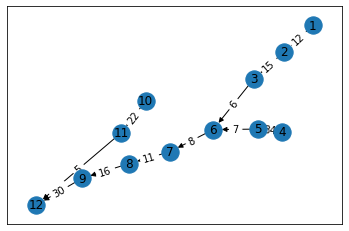

In [51]:
#Вводим ребра, веса, делаем граф короч

G = nx.DiGraph() #создаем направленный граф
q = '+'
while q == '+': 
    q = input('продолжаем? (+ или -)')
    if q == '+':
        x = int(input('начало: ')) 
        y = int(input('конец: '))
        z = int(input('вес: '))
        

    G.add_edge(x, y, weight = z) #создаем ребро по заданным данным

#рисуем граф
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G, 
                             pos = pos, 
                             edge_labels = nx.get_edge_attributes(G, 'weight'))

{(1, 2): Text(0.6988653256379012, 0.3291718738121885, '12'),
 (2, 3): Text(0.5077679211208544, 0.22530602516526585, '15'),
 (4, 5): Text(0.5140044241776958, -0.027744456877318417, '34'),
 (5, 6): Text(0.2913267409908187, -0.02384777597307486, '7'),
 (3, 6): Text(0.277241503319329, 0.07397294920908958, '6'),
 (6, 7): Text(0.0058061749887517305, -0.06764859494619836, '8'),
 (7, 8): Text(-0.2669501875194751, -0.13374276017365527, '11'),
 (8, 9): Text(-0.5516956607941668, -0.18548476707644176, '16'),
 (10, 11): Text(-0.3715417037568659, 0.02404991343377612, '22'),
 (11, 12): Text(-0.7258498299438432, -0.17777706781337005, '5'),
 (9, 12): Text(-0.8516193618585848, -0.2657075194040803, '30')}

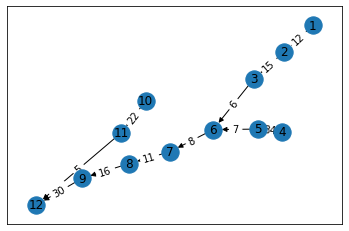

In [52]:
# pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G, 
                             pos = pos, 
                             edge_labels = nx.get_edge_attributes(G, 'weight'))

In [53]:
#получившиеся ребра1

s = [i for i in G.edges()]
s

[(1, 2),
 (2, 3),
 (4, 5),
 (5, 6),
 (3, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (10, 11),
 (11, 12),
 (9, 12)]

### Предшествующие работы

In [54]:
d = dict()
    
for i in range(len(s)): #берем ребро i
    for j in range(len(s)): #сверяем i со всеми ребрами (j)
        if s[i][0] == s[j][1]: #если начало ребра i равно концу ребра j то проходит
            
            #заполняем словарь
            try:
                d[s[i]].append(s[j])
            except KeyError:
                d[s[i]] = [s[j]]
                
d

{(2, 3): [(1, 2)],
 (5, 6): [(4, 5)],
 (3, 6): [(2, 3)],
 (6, 7): [(5, 6), (3, 6)],
 (7, 8): [(6, 7)],
 (8, 9): [(7, 8)],
 (11, 12): [(10, 11)],
 (9, 12): [(8, 9)]}

In [56]:
#Делаем масссив с предшествующими работами
pw = []

for i in G.edges():
    if i in d.keys():
        pw.append(d[i])
#         print(d[i])
    else:
        pw.append('-')
#         print('-')
        
pw

['-',
 [(1, 2)],
 '-',
 [(4, 5)],
 [(2, 3)],
 [(5, 6), (3, 6)],
 [(6, 7)],
 [(7, 8)],
 '-',
 [(10, 11)],
 [(8, 9)]]

###  Ранее начало

In [57]:
#делаем список с ребрами и весами, чтобы удобно было смотерть веса ребер
weight = nx.get_edge_attributes(G, 'weight')
weight

{(1, 2): 12,
 (2, 3): 15,
 (4, 5): 34,
 (5, 6): 7,
 (3, 6): 6,
 (6, 7): 8,
 (7, 8): 11,
 (8, 9): 16,
 (10, 11): 22,
 (11, 12): 5,
 (9, 12): 30}

In [58]:
weight_temp = weight.copy()
# weight_temp

# Почему-то следующую ячекйку нужно запускать, до тех пор пока не прекратятся изменения 

In [69]:
counter = -1 #для индекса ребер 

for i in pw:
    counter +=1
    
    if i == '-':
        weight_temp[list(G.edges())[counter]] = 0
        
    if i != '-': 
        #прверяющее ребро = вес предшествующей работы + РН предшеств. работы
        weight_temp[list(G.edges())[counter]] = weight[i[0]] + weight_temp[pw[counter][0]] 

        #если несколько предшеств. работ
        if len(i) > 1:
#             print(i)
            weight_temp[list(G.edges())[counter]] = 0 #чистим действующее ребро 
            
            maxx = -1
            for j in i: #проходимся по предшествующим работам по отдельности
#                 print(j)

                #ищем максимальный путь до проверяющего ребра
                temp_sum = weight[j] + weight_temp[j]
                if temp_sum > maxx:
                    maxx = temp_sum
#                     print(maxx)
#             print(maxx)
                
            #присваиваем действующему ребру правильный РН
            weight_temp[list(G.edges())[counter]] = maxx

weight_temp

{(1, 2): 0,
 (2, 3): 12,
 (4, 5): 0,
 (5, 6): 34,
 (3, 6): 27,
 (6, 7): 41,
 (7, 8): 49,
 (8, 9): 60,
 (10, 11): 0,
 (11, 12): 22,
 (9, 12): 76}

### Промежуточная Табличка

In [67]:
edge_labels = nx.get_edge_attributes(G, 'weight')

df = pd.DataFrame()

df['работа'] = list(G.edges())
df['дни'] = list(edge_labels.values())
df['предшеств. раб'] = pw
df['Р.Н.'] = weight_temp.values()
df['Р.О.'] = df['дни'] + df['Р.Н.']

df

,работа,дни,предшеств. раб,Р.Н.,Р.О.
0,"(1, 2)",12,-,0,12
1,"(2, 3)",15,"[(1, 2)]",12,27
2,"(4, 5)",34,-,0,34
3,"(5, 6)",7,"[(4, 5)]",34,41
4,"(3, 6)",6,"[(2, 3)]",27,33
5,"(6, 7)",8,"[(5, 6), (3, 6)]",41,49
6,"(7, 8)",11,"[(6, 7)]",49,60
7,"(8, 9)",16,"[(7, 8)]",60,76
8,"(10, 11)",22,-,0,22
9,"(11, 12)",5,"[(10, 11)]",22,27


# ПН

In [61]:
#находим максимальный элемент в РО, нужно нуже
max_G = list(df['Р.О.'])
max_PO = -1
for i in max_G:
#     print(i)
    if i > max_PO:
        max_PO = i 
        
max_PO

106

In [62]:
#находим работы, которых нет в предшествующих, чтобы вычислить их ПН отдельно
q=0
not_pw = []
for j in range(len(df['работа'])):
    for i in df['предшеств. раб']:
        if i == '-':
            q+=1
            continue
        if df['работа'][j] not in i:
            q+=1
            if q==len(df['работа']):
                not_pw.append(df['работа'][j])
#     print(q)
    q=0
not_pw

[(11, 12), (9, 12)]

In [63]:
#делаем словарь для ПН
PN_dict_pw ={}
for i in s:
    PN_dict_pw[i] = 0

In [64]:
#вычисляем ПН для работ, которых нет в предшествующих
for i in not_pw:
    PN_dict_pw[i] = max_PO - weight[i]

In [95]:
#список с началом ребер со столбца работы, нужно ниже
edges_temp = []
for i in list(G.edges()):
    edges_temp.append(i[0])
print(edges_temp)

[1, 2, 4, 5, 3, 6, 7, 8, 10, 11, 9]


In [96]:
PN_dict_pw

{(1, 2): 0,
 (2, 3): 0,
 (4, 5): 0,
 (5, 6): 0,
 (3, 6): 0,
 (6, 7): 0,
 (7, 8): 0,
 (8, 9): 0,
 (10, 11): 79,
 (11, 12): 101,
 (9, 12): 76}

In [97]:
while len(edges_temp) > 0: #пока список не пустой
    #ищем максимум, чтобы идти с конца
    max_pn = -1
    for i in edges_temp:
        if i > max_pn:
            max_pn = i
    print('начало ребра, со столбца работа: ', max_pn)
    
    #нужно ниже
    co = 0
    for i in edges_temp:
        if i == max_pn:
            co +=1
    print('кол-во ребер с таким числом: ', co)#нужно ниже

    conter_edges = []
    for i in PN_dict_pw: #проходимся по ребрам ПН
         if i[0] == max_pn: #находим ребра начинающиеся с max_pn
            conter_edges.append(i) # тут расшифрованное ребро
            if conter_edges[0] not in d.keys():
                    continue
            print(conter_edges)
            if co == 1: #если ребро одно, то
                print('рберо: ', conter_edges)
                print('пред. раб.: ', d[conter_edges[0]]) #предшествующие работы этого ребра
                for j in d[conter_edges[0]]: #проходимся по предшествующим работам ребра
                    PN_dict_pw[j] = PN_dict_pw[i] - weight[j] #вычисляем ПН
                    print('ПН', j,': ', PN_dict_pw[j])
                    
            else:
                min_for_temp_pn = 9999999 #для поиска минимального ПН
                if len(conter_edges) == co: #если кол-во ребер максимальное(чтобы были все сразу, иначе выводится пирамидкой, добавляясь по одной)
                    print('рбера: ', conter_edges)
                    for q in conter_edges: #проходимся по всем ребрам этого 'co'
                        #находим минимальный ПН
                        if PN_dict_pw[q] < min_for_temp_pn: 
                            min_for_temp_pn = PN_dict_pw[q]
                    if q == '-':
                        continue
                    print('пред. раб.: ', d[q])
                    for l in d[q]: #проходимся по предшествующим работам
                        PN_dict_pw[l] = min_for_temp_pn - weight[l] #вычисляем ПН 
                        print('ПН', l,': ', PN_dict_pw[l])
                    print(min_for_temp_pn)

    #удаляем дубликаты одного чила
    for i in edges_temp:
        if i == max_pn:
            edges_temp.remove(i)
    
    #когда ребер больше 1, то не удалялся последний, убираем и его
    if max_pn in edges_temp:
        edges_temp.remove(max_pn)
#     print(edges_temp)
    print()

начало ребра, со столбца работа:  11
кол-во ребер с таким числом:  1
[(11, 12)]
рберо:  [(11, 12)]
пред. раб.:  [(10, 11)]
ПН (10, 11) :  79

начало ребра, со столбца работа:  10
кол-во ребер с таким числом:  1

начало ребра, со столбца работа:  9
кол-во ребер с таким числом:  1
[(9, 12)]
рберо:  [(9, 12)]
пред. раб.:  [(8, 9)]
ПН (8, 9) :  60

начало ребра, со столбца работа:  8
кол-во ребер с таким числом:  1
[(8, 9)]
рберо:  [(8, 9)]
пред. раб.:  [(7, 8)]
ПН (7, 8) :  49

начало ребра, со столбца работа:  7
кол-во ребер с таким числом:  1
[(7, 8)]
рберо:  [(7, 8)]
пред. раб.:  [(6, 7)]
ПН (6, 7) :  41

начало ребра, со столбца работа:  6
кол-во ребер с таким числом:  1
[(6, 7)]
рберо:  [(6, 7)]
пред. раб.:  [(5, 6), (3, 6)]
ПН (5, 6) :  34
ПН (3, 6) :  35

начало ребра, со столбца работа:  5
кол-во ребер с таким числом:  1
[(5, 6)]
рберо:  [(5, 6)]
пред. раб.:  [(4, 5)]
ПН (4, 5) :  0

начало ребра, со столбца работа:  4
кол-во ребер с таким числом:  1

начало ребра, со столбца рабо

# Таблица

In [98]:
df['П.Н.'] = PN_dict_pw.values()
df['П.О.'] = df['П.Н.'] + df['дни']
df['Резерв'] = df['П.Н.'] - df['Р.Н.']
df

,работа,дни,предшеств. раб,Р.Н.,Р.О.,П.Н.,П.О.,Резерв
0,"(1, 2)",12,-,0,12,8,20,8
1,"(2, 3)",15,"[(1, 2)]",12,27,20,35,8
2,"(4, 5)",34,-,0,34,0,34,0
3,"(5, 6)",7,"[(4, 5)]",34,41,34,41,0
4,"(3, 6)",6,"[(2, 3)]",27,33,35,41,8
5,"(6, 7)",8,"[(5, 6), (3, 6)]",41,49,41,49,0
6,"(7, 8)",11,"[(6, 7)]",49,60,49,60,0
7,"(8, 9)",16,"[(7, 8)]",60,76,60,76,0
8,"(10, 11)",22,-,0,22,79,101,79
9,"(11, 12)",5,"[(10, 11)]",22,27,101,106,79
